In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# библиотека "plotly.express" используется больше для визуализации решений, то есть выступает как BI-инструмент
import plotly.express as px

# %matplotlib inline - означает, что графики мы будем строить сразу же в юпитер ноутбуке
%matplotlib inline

In [3]:
sns.set(font_scale = 2 , style = "whitegrid", rc = {"figure.figsize":(20,7)})

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.
В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета. 

In [4]:
games = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-allaberganov/Statistics/Project_1/games.csv')
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Размерность полученного датафрейма составляет (16598, 11). Далее мы рассмотрим типы данных, и наличие пропущенных значений,
то есть NA или NaN.

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Из вышеприведенного можно заметить, что тип данных в колонке "Year" составляет float64, хотя они должны быть datetime.
Также стоит отметить, что в трех колонках есть пропущенные значения: Year, Genre, Publisher. Далее выясним количество пропущенных значений в каждом столбце, а потом дропнем их.                  

In [6]:
# посчитали количество пропушенных значений для каждой колонки в нашем датафрейме
pd.isna(games).sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# дропаем пропущенные значения из датафрейма
games = games.dropna()

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
#теперь можно изменить тип данных в столбце "Year" на datetime64
games['Year'] = pd.to_datetime(games['Year'], format = '%Y')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
games['Year'] = games['Year'].dt.year

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [13]:
# описательная характеристика переменной "Year"

games['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [14]:
# чтобы найти моду, используем метод value_counts(), так как мода показывает элемент, который чаще всего встречается

games['Year'].value_counts()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [15]:
# сгруппировали игры по годам, и далее смотрим на, то как они расперделены по годам

games_by_year = games.groupby('Year', as_index = False) \
    .agg({'Name': 'count'}) \
    .rename(columns = {'Name': 'game_number'})

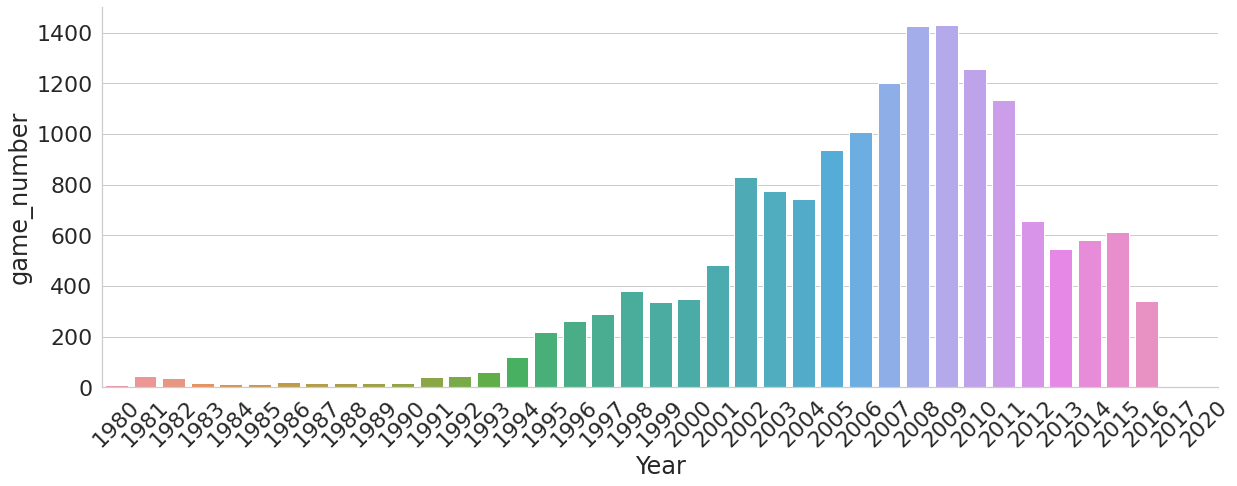

In [16]:
# построили график, который наглядно показывает распределение игр по годам

ax = sns.barplot(data = games_by_year, x = 'Year', y = 'game_number')
ax.set_xticklabels(games_by_year['Year'], rotation = 45)
sns.despine()

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [17]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
games_by_platform = games.groupby('Platform', as_index = False) \
    .agg({'Name': 'count'}) \
    .rename(columns = {'Name': 'game_number'}) \
    .sort_values('game_number', ascending = False)

In [19]:
games_by_platform['total_number'] = games_by_platform['game_number'].sum()
games_by_platform['share'] = (games_by_platform['game_number']/games_by_platform['total_number']) * 100

In [20]:
df1 = games_by_platform.query('share > 7')

In [21]:
list(df1['Platform'])

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [22]:
series = games['Platform'].value_counts(normalize=True) * 100
series

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
WS       0.036830
SCD      0.036830
3DO      0.018415
TG16     0.012277
PCFX     0.006138
GG       0.006138
Name: Platform, dtype: float64

In [23]:
games['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Adeline Software                   1
Game Arts                          1
KSS                                1
Yumedia                            1
Illusion Softworks                 1
Name: Publisher, Length: 576, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 
    В каком регионе медианное значение объема продаж является наибольшим?
    Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [25]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
Nintendo = games.query("Publisher == 'Nintendo'")

In [51]:
Nintendo.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:
по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

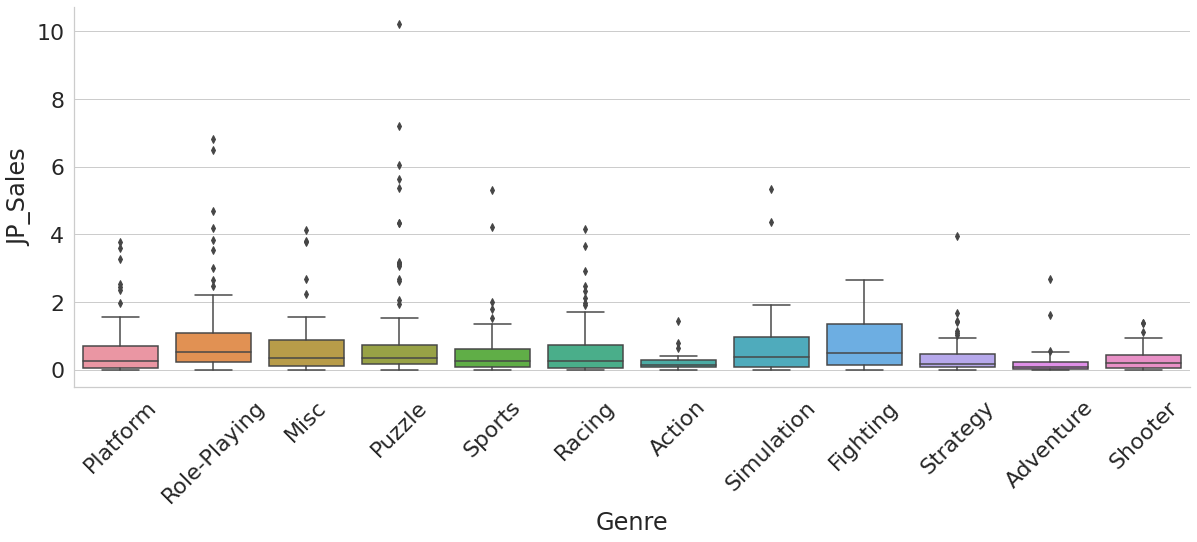

In [53]:
bx = sns.boxplot(data = Nintendo, x = 'Genre', y = 'JP_Sales')
bx.set_xticklabels(JP_sales['Genre'], rotation = 45)
sns.despine()

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [70]:
Gb_sales = games.query("Publisher == 'Nintendo' & Genre == ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']") \
    .groupby(['Genre','Year'], as_index = False) \
    .agg({'Global_Sales': 'sum'}) \
    .sort_values('Year', ascending = True) \
    .query("Genre == 'Sports'")

In [72]:
Gb_sales

,Genre,Year,Global_Sales
86,Sports,1983,3.20
87,Sports,1984,6.18
88,Sports,1985,1.96
89,Sports,1987,2.15
90,Sports,1988,2.42
91,Sports,1989,5.72
92,Sports,1990,1.48
93,Sports,1991,1.38
94,Sports,1993,0.80
95,Sports,1994,0.59


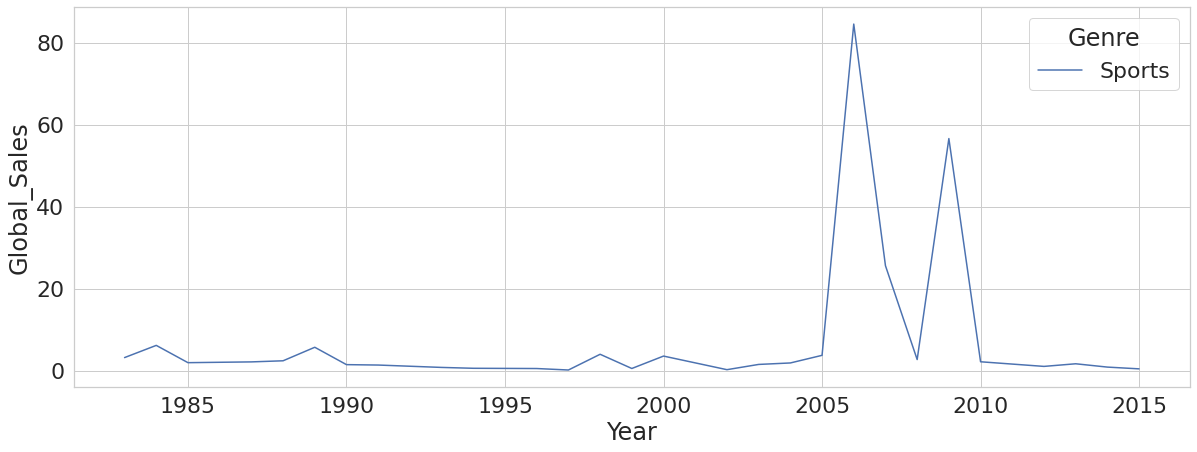

In [73]:
ax = sns.lineplot(data = Gb_sales, x = 'Year', y = 'Global_Sales', hue = 'Genre')
# ax.set_xticklabels(Gb_sales['Year'], rotation = 45)
# sns.despine()